In [1]:
import EoN
import numpy as np
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm.autonotebook import tqdm

plt.style.use('seaborn-white')
sns.set_style("ticks")
sns.set_context("talk")
%matplotlib inline

/Users/agarbuno/anaconda2/envs/risknet/lib/python3.6/site-packages/ipykernel_launcher.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  


In [2]:
import sys
sys.path.append('/Users/agarbuno/github-repos/collaborations/covid/risk-networks/risknet')

In [3]:
%load_ext autoreload
%autoreload 2
import epimodels

In [4]:
N = 10000
G = nx.fast_gnp_random_graph(N, 5./(N-1))

In [5]:
epistatic = epimodels.static(G, N)

In [6]:
epistatic.init(beta = 0.06)

In [7]:
infected = range(400)
epistatic.init_infected(infected)

In [8]:
nsims = 50
sims  = []

return_statuses = ('S', 'E', 'I', 'H', 'R', 'D')

for kk in tqdm(np.arange(nsims), desc = 'Simulations'):
    sim = epistatic.simulate(return_statuses)
    sims.append(sim)

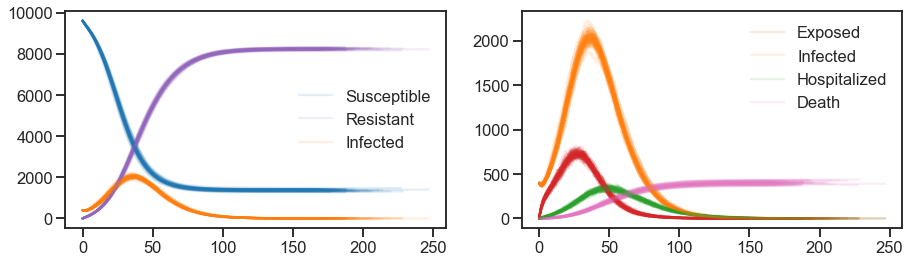

In [9]:
fig, axes = plt.subplots(1, 2, figsize = (15, 4))

for sim in tqdm(sims, desc = 'Simulations'):
    times, states = sim.summary()
    axes[0].plot(times, states['S'], color = 'C0', alpha = 0.12)
    axes[0].plot(times, states['R'], color = 'C4', alpha = 0.12)
    axes[0].plot(times, states['I'], color = 'C1', alpha = 0.12)

    axes[1].plot(times, states['E'], color = 'C3', alpha = 0.12)
    axes[1].plot(times, states['I'], color = 'C1', alpha = 0.12)
    axes[1].plot(times, states['H'], color = 'C2', alpha = 0.12)
    axes[1].plot(times, states['D'], color = 'C6', alpha = 0.12)

axes[0].legend(['Susceptible', 'Resistant', 'Infected']);
axes[1].legend(['Exposed', 'Infected', 'Hospitalized', 'Death']);

In [10]:
E, I, H, R, D = np.zeros([5, N])
S = np.ones(N,)
I[infected] = 1.
S[infected] = 0.

In [11]:
y0 = np.hstack((S, E, I, H, R, D))
T = 300
t = np.linspace(0,T,201)

In [12]:
epistatic.set_solver(T = T, dt = 5.)

In [13]:
ke = epistatic.solve(y0, t)

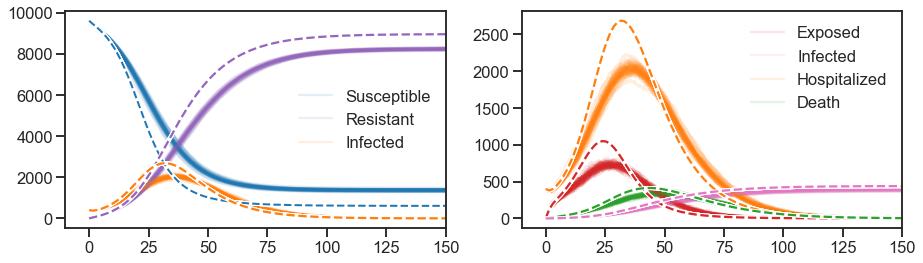

In [15]:
fig, axes = plt.subplots(1, 2, figsize = (15, 4))

for sim in tqdm(sims, desc = 'Simulations'):
    times, states = sim.summary()
    axes[0].plot(times, states['S'], color = 'C0', alpha = 0.12)
    axes[0].plot(times, states['R'], color = 'C4', alpha = 0.12)
    axes[0].plot(times, states['I'], color = 'C1', alpha = 0.12)
    
    axes[0].plot(t, N * ke.y.reshape(6, N, -1).mean(axis = 1)[0], color = 'white', linestyle = '-', linewidth = 4)
    axes[0].plot(t, N * ke.y.reshape(6, N, -1).mean(axis = 1)[0], color = 'C0', linestyle = '--', linewidth = 2)
    axes[0].plot(t, N * ke.y.reshape(6, N, -1).mean(axis = 1)[-2], color = 'white', linestyle = '-', linewidth = 4)
    axes[0].plot(t, N * ke.y.reshape(6, N, -1).mean(axis = 1)[-2], color = 'C4', linestyle = '--')
    axes[0].plot(t, N * ke.y.reshape(6, N, -1).mean(axis = 1)[2], color = 'white', linestyle = '-', linewidth = 4)
    axes[0].plot(t, N * ke.y.reshape(6, N, -1).mean(axis = 1)[2], color = 'C1', linestyle = '--')

    
    axes[1].plot(times, states['E'], color = 'C3', alpha = 0.12)
    axes[1].plot(times, states['D'], color = 'C6', alpha = 0.12)
    axes[1].plot(times, states['I'], color = 'C1', alpha = 0.12)
    axes[1].plot(times, states['H'], color = 'C2', alpha = 0.12)
    
    axes[1].plot(t, N * ke.y.reshape(6, N, -1).mean(axis = 1)[1], color = 'white', linestyle = '-', linewidth = 4)
    axes[1].plot(t, N * ke.y.reshape(6, N, -1).mean(axis = 1)[1], color = 'C3', linestyle = '--')
    axes[1].plot(t, N * ke.y.reshape(6, N, -1).mean(axis = 1)[2], color = 'white', linestyle = '-', linewidth = 4)
    axes[1].plot(t, N * ke.y.reshape(6, N, -1).mean(axis = 1)[2], color = 'C1', linestyle = '--')
    axes[1].plot(t, N * ke.y.reshape(6, N, -1).mean(axis = 1)[-3], color = 'white', linestyle = '-', linewidth = 4)
    axes[1].plot(t, N * ke.y.reshape(6, N, -1).mean(axis = 1)[-3], color = 'C2', linestyle = '--')
    axes[1].plot(t, N * ke.y.reshape(6, N, -1).mean(axis = 1)[-1], color = 'white', linestyle = '-', linewidth = 4)
    axes[1].plot(t, N * ke.y.reshape(6, N, -1).mean(axis = 1)[-1], color = 'C6', linestyle = '--')

axes[0].legend(['Susceptible', 'Resistant', 'Infected']);
axes[1].legend(['Exposed', 'Infected', 'Hospitalized', 'Death']);

for ax in axes:
    ax.set_xlim(-10, 150)